In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



#  loading the data set 
file = pd.read_csv('BSOM_DataSet_for_HW2.csv')

df=file[['all_mcqs_avg_n20','all_NBME_avg_n4','LEVEL']]

df['LEVEL'].fillna(value='A', inplace=True) 

#df.fillna(df['STEP_1'].mean(), inplace=True)
LEVEL = {'A': 0,'B': 1,'C':2,'D':3}

df.LEVEL = [LEVEL[item] for item in df.LEVEL] 
#print(df) 
X= np.array(df.iloc[:,0:2])

target=df.iloc[:,-1]




X_reg = (X - X.mean())/(X.max()-X.min())
#X = np.c_[np.ones((len(X), 1)), X]


X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_reg,target, test_size=0.30, random_state =33)





In [2]:

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def  Cost(X_train,theta,y_mapp):
    y_pred =  sigmoid(X_train.dot(theta))
    cost = np.sum((-y_mapp * np.log(y_pred)) - ((1-y_mapp)*np.log(1-y_pred)))/ len(X_train) 
    #print('cost',cost)
    return cost

def Mapping(i,y_train):
    ymapped=np.where(y_train == i, 1, 0)
    return ymapped

def gradient_Descent(X_train,y_train,epochss,alphaa):
    theta = []
    cost_value=[]
    c_t=[]
    thetas_inside =  np.random.rand(3,1) 
    X_train = np.c_[np.ones((len(X_train), 1)), X_train]
    # here i in range 4 since we have four class labels
    for i in range(4):
        y_mapp=Mapping(i,y_train)
        cost_each = np.zeros(epochss)
        e= 0
            
        while (e < epochss):

            cost_each[i] = Cost(X_train,thetas_inside,y_mapp)
            c1=Cost(X_train,thetas_inside,y_mapp)
            ynot = sigmoid(np.dot(X_train,(thetas_inside)))
            thetas_inside = thetas_inside - ((alphaa / len(X_train)) * np.sum(np.dot(X_train.T,(ynot - y_mapp))))
            
            c_t.append(c1)  

            e+=1
            
        
        theta.append(thetas_inside)
        cost_value.append(cost_each)
    


    return theta,c_t


def Logistic_Regression( X_train, y_train,epochss,alphaa):

    y_train = y_train.to_numpy().reshape(len(X_train),1)
    
    thetas_pred,c_t=gradient_Descent(X_train,y_train,epochss,alphaa)
    return thetas_pred,c_t
      
        
thetas1,c_t=Logistic_Regression(X_train_FS,y_train_FS,10000,0.1)


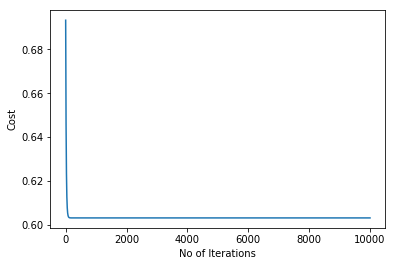

In [3]:

cost_val=[]
for i in range(10000):
    cost_val.append(c_t[i])
    
i=list(range (len(cost_val)))
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.plot(i,cost_val)
plt.show()


    

    

In [4]:
def Predict(X_test,thetas1):
    
    X = np.c_[np.ones((len(X_test), 1)), X_test]
    thetaA=[]
    thetaB=[]
    thetaC=[]
    thetaD=[]
    val1_sig=np.matrix(thetas1[0].T)*np.array(X.T)
    val1=sigmoid(val1_sig)
    val2_sig=np.matrix(thetas1[1].T)*np.array(X.T)
    val2=sigmoid(val2_sig)

    val3_sig=np.matrix(thetas1[2].T)*np.array(X.T)
    val3=sigmoid(val3_sig)
    val4_sig=np.matrix(thetas1[3].T)*np.array(X.T)
    val4=sigmoid(val4_sig)
    val2_df=pd.DataFrame(val2)
    val3_df=pd.DataFrame(val3)
    val4_df=pd.DataFrame(val4)
    belongs_to=pd.DataFrame(val1)


    belongs_to=pd.concat([belongs_to,val2_df], ignore_index=True)
    belongs_to=pd.concat([belongs_to,val3_df], ignore_index=True)
    belongs_to=pd.concat([belongs_to,val4_df], ignore_index=True)

    belongs_to_T=belongs_to.T

    

    values=belongs_to_T.idxmax(axis=1)
    return values

y_pred=Predict(X_test_FS,thetas1)
#values1

In [5]:
print('The confuision matrix is :')
print(confusion_matrix(y_test_FS, y_pred))

print('The accuracy is ',accuracy_score(y_test_FS, y_pred))
print(classification_report(y_test_FS, y_pred))

print('f1_score',f1_score(y_test_FS, y_pred, average="macro"))
print('precision_score',precision_score(y_test_FS, y_pred, average="macro"))
print('recall_score',recall_score(y_test_FS, y_pred, average="macro"))  


The confuision matrix is :
[[ 0 12  0  1]
 [ 0 14  0  0]
 [ 0  8  0  0]
 [ 0  0  0  0]]
The accuracy is  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.41      1.00      0.58        14
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         0

   micro avg       0.40      0.40      0.40        35
   macro avg       0.10      0.25      0.15        35
weighted avg       0.16      0.40      0.23        35

f1_score 0.14583333333333334
precision_score 0.10294117647058823
recall_score 0.25
